# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [108]:
#Import your libraries

import numpy as np
import pandas as pd

# Introduction

In this lab, we will use two datasets. Both datasets contain variables that describe apps from the Google Play Store. We will use our knowledge in feature extraction to process these datasets and prepare them for the use of a ML algorithm.

# Challenge 1 - Loading and Extracting Features from the First Dataset

#### In this challenge, our goals are: 

* Exploring the dataset.
* Identify the columns with missing values.
* Either replacing the missing values in each column or drop the columns.
* Conver each column to the appropriate type.

#### The first dataset contains different information describing the apps. 

Load the dataset into the variable `google_play` in the cell below. The dataset is in the file `googleplaystore.csv`

In [109]:
# Your code here:

google_play = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_3/Lab_5_Feature-Extraction/data/googleplaystore.csv')

#### Examine all variables and their types in the following cell

In [110]:
# Your code here:

google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Since this dataset only contains one numeric column, let's skip the `describe()` function and look at the first 5 rows using the `head()` function

In [111]:
# Your code here:

google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### We can see that there are a few columns that could be coerced to numeric.

Start with the reviews column. We can evaluate what value is causing this column to be of object type finding the non-numeric values in this column. To do this, we recall the `to_numeric()` function. With this function, we are able to coerce all non-numeric data to null. We can then use the `isnull()` function to subset our dataframe using the True/False column that this function generates.

In the cell below, transform the Reviews column to numeric and assign this new column to the variable `Reviews_numeric`. Make sure to coerce the errors.

In [112]:

google_play[google_play['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [113]:
google_play.iloc[10472, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [114]:
google_play['Reviews_numeric'] = pd.to_numeric(google_play['Reviews'], errors="coerce")

Next, create a column containing True/False values using the `isnull()` function. Assign this column to the `Reviews_isnull` variable.

In [115]:
# Your code here:
google_play['Reviews_isnull'] = google_play['Reviews_numeric'].isnull()
google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Reviews_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510.0,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967.0,False


In [116]:
google_play['Reviews_isnull'].value_counts()

False    10840
True         1
Name: Reviews_isnull, dtype: int64

In [117]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           9367 non-null   float64
 3   Reviews          10841 non-null  object 
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10840 non-null  object 
 7   Price            10841 non-null  object 
 8   Content Rating   10840 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Ver      10833 non-null  object 
 12  Android Ver      10838 non-null  object 
 13  Reviews_numeric  10840 non-null  float64
 14  Reviews_isnull   10841 non-null  bool   
dtypes: bool(1), float64(2), object(12)
memory usage: 1.2+ MB


Finally, subset the `google_play` with `Reviews_isnull`. This should give you all the rows that contain non-numeric characters.

Your output should look like:

![Reviews_bool.png](reviews-bool.png)

#### We see that Google Play is using a shorthand for millions. 

Let's write a function to transform this data.

Steps:

1. Create a function that returns the correct numeric values of *Reviews*.
1. Define a test string with `M` in the last character.
1. Test your function with the test string. Make sure your function works correctly. If not, modify your functions and test again.

In [118]:
import re
import pandas as pd

In [119]:
# Your code here

def convert_string_to_numeric(s):
    """
    Convert a string value to numeric. If the last character of the string is `M`, obtain the 
    numeric part of the string, multiply it with 1,000,000, then return the result. Otherwise, 
    convert the string to numeric value and return the result.
    
    Args:
        s: The Reviews score in string format.

    Returns:
        The correct numeric value of the Reviews score.
    """
    
    if s.endswith("M"):
        s = s.replace("M", "")
        s = pd.to_numeric(s) * 1000000
        return s 
    else : 
        s = pd.to_numeric(s)
        return s
    
test_string = '4.0M'

convert_string_to_numeric(test_string) == 4000000

True

In [120]:
google_play['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


The last step is to apply the function to the `Reviews` column in the following cell:

In [121]:
google_play['Reviews']=google_play['Reviews'].apply(lambda x: convert_string_to_numeric(x))

Check the non-numeric `Reviews` row again. It should have been fixed now and you should see:

![Reviews_bool_fixed.png](reviews-bool-fixed.png)

In [122]:
google_play['Reviews'][10472]

3000000.0

Also check the variable types of `google_play`. The `Reviews` column should be a `float64` type now.

In [123]:
# Your code here:

google_play['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype  
--------------  -----  
10841 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


#### The next column we will look at is `Size`. We start by looking at all unique values in `Size`:

*Hint: use `unique()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html))*.

In [124]:
# Your code here:

google_play['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

You should have seen lots of unique values of the app sizes.

#### While we can convert most of the `Size` values to numeric in the same way we converted the `Reviews` values, there is one value that is impossible to convert.

What is that badass value? Enter it in the next cell and calculate the proportion of its occurence to the total number of records of `google_play`.

In [125]:
numer = len(google_play.loc[google_play['Size'].str.startswith('Varies')])
denom = len(google_play['Size'])

proportion = round(numer / denom, 3)

proportion


0.156

#### While this column may be useful for other types of analysis, we opt to drop it from our dataset. 

There are two reasons. First, the majority of the data are ordinal but a sizeable proportion are missing because we cannot convert them to numerical values. Ordinal data are both numerical and categorical, and they usually can be ranked (e.g. 82k is smaller than 91M). In contrast, non-ordinal categorical data such as blood type and eye color cannot be ranked. The second reason is as a categorical column, it has too many unique values to produce meaningful insights. Therefore, in our case the simplest strategy would be to drop the column.

Drop the column in the cell below (use `inplace=True`)

In [126]:
# Your code here:

google_play1 = google_play.drop(columns= "Size", axis=1)

In [127]:
google_play.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Reviews_numeric    float64
Reviews_isnull        bool
dtype: object

#### Now let's look at how many missing values are in each column. 

This will give us an idea of whether we should come up with a missing data strategy or give up on the column all together. In the next column, find the number of missing values in each column: 

*Hint: use the `isna()` and `sum()` functions.*

In [128]:
# Your code here:

google_play.isna().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Ver           8
Android Ver           3
Reviews_numeric       1
Reviews_isnull        0
dtype: int64

In [129]:
google_play.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Ver           8
Android Ver           3
Reviews_numeric       1
Reviews_isnull        0
dtype: int64

You should find the column with the most missing values is now `Rating`.

#### What is the proportion of the missing values in `Rating` to the total number of records?

Enter your answer in the cell below.

In [130]:
# Your code here:

num = len(google_play.loc[google_play['Rating'].isna()])
den = len(google_play['Rating'])

proportion2 = round(num/ den, 3)

proportion2

0.136

A sizeable proportion of the `Rating` column is missing. A few other columns also contain several missing values.

#### We opt to preserve these columns and remove the rows containing missing data.

In particular, we don't want to drop the `Rating` column because:

* It is one of the most important columns in our dataset. 

* Since the dataset is not a time series, the loss of these rows will not have a negative impact on our ability to analyze the data. It will, however, cause us to lose some meaningful observations. But the loss is limited compared to the gain we receive by preserving these columns.

In the cell below, remove all rows containing at least one missing value. Use the `dropna()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)). Assign the new dataframe to the variable `google_missing_removed`.

In [131]:
# Your code here:

google_missing_removed = google_play.dropna(axis=0)


In [132]:
google_missing_removed.isna().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Reviews_numeric    0
Reviews_isnull     0
dtype: int64

From now on, we use the `google_missing_removed` variable instead of `google_play`.

#### Next, we look at the `Last Updated` column.

The `Last Updated` column seems to contain a date, though it is classified as an object type. Let's convert this column using the `pd.to_datetime` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)).

In [133]:
# Your code here:
google_missing_removed["Last Updated"] = pd.to_datetime(google_missing_removed["Last Updated"])

C:\Users\olivi\AppData\Local\Temp\ipykernel_29000\1972404124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_missing_removed["Last Updated"] = pd.to_datetime(google_missing_removed["Last Updated"])


In [134]:
google_missing_removed.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
Reviews_numeric           float64
Reviews_isnull               bool
dtype: object

#### The last column we will transform is `Price`. 

We start by looking at the unique values of this column.

In [135]:
# Your code here:
google_missing_removed['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Since all prices are ordinal data without exceptions, we can tranform this column by removing the dollar sign and converting to numeric. We can create a new column called `Price Numerical` and drop the original column.

We will achieve our goal in three steps. Follow the instructions of each step below.

#### First we remove the dollar sign. Do this in the next cell by applying the `str.replace` function to the column to replace `$` with an empty string (`''`).

In [136]:
# Your code here:

google_missing_removed['Price Numerical'] = google_missing_removed['Price'].str.replace("$", "")


C:\Users\olivi\AppData\Local\Temp\ipykernel_29000\597087824.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_missing_removed['Price Numerical'] = google_missing_removed['Price'].str.replace("$", "")
C:\Users\olivi\AppData\Local\Temp\ipykernel_29000\597087824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_missing_removed['Price Numerical'] = google_missing_removed['Price'].str.replace("$", "")


#### Second step, coerce the `Price Numerical` column to numeric.

In [137]:
# Your code here:

google_missing_removed['Price Numerical'] = pd.to_numeric(google_missing_removed['Price Numerical'])

C:\Users\olivi\AppData\Local\Temp\ipykernel_29000\317345484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_missing_removed['Price Numerical'] = pd.to_numeric(google_missing_removed['Price Numerical'])


**Finally, drop the original `Price` column.**

In [138]:
# Your code here:

google_missing_removed2 = google_missing_removed.drop("Price", axis=1)


In [139]:
google_missing_removed = google_missing_removed2

Now check the variable types of `google_missing_removed`. Make sure:

* `Size` and `Price` columns have been removed.
* `Rating`, `Reviews`, and `Price Numerical` have the type of `float64`.
* `Last Updated` has the type of `datetime64`.

In [140]:
google_missing_removed2 = google_missing_removed.drop("Size", axis=1)
google_missing_removed = google_missing_removed2

In [141]:
# Your code here

google_missing_removed.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Installs                   object
Type                       object
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
Reviews_numeric           float64
Reviews_isnull               bool
Price Numerical           float64
dtype: object

# Challenge 2 - Loading and Extracting Features from the Second Dataset

Load the second dataset to the variable `google_reviews`. The data is in the file `googleplaystore_user_reviews.csv`.

In [142]:
# Your code here:

google_review = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_3/Lab_5_Feature-Extraction/data/googleplaystore_user_reviews.csv')

#### This dataset contains the top 100 reviews for each app. 

Let's examine this dataset using the `head` function

In [143]:
# Your code here
google_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [144]:
google_review['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

#### The main piece of information we would like to extract from this dataset is the proportion of positive reviews of each app. 

Columns like `Sentiment_Polarity` and `Sentiment_Subjectivity` are not to our interests because we have no clue how to use them. We do not care about `Translated_Review` because natural language processing is too complex for us at present (in fact the `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` columns are derived from `Translated_Review` the data scientists). 

What we care about in this challenge is `Sentiment`. To be more precise, we care about **what is the proportion of *Positive* sentiment of each app**. This will require us to aggregate the `Sentiment` data by `App` in order to calculate the proportions.

Now that you are clear about what we are trying to achieve, follow the steps below that will walk you through towards our goal.

#### Our first step will be to remove all rows with missing sentiment. 

In the next cell, drop all rows with missing data using the `dropna()` function and assign this new dataframe to `review_missing_removed`.

In [145]:
# Your code here:

review_missing_removed = google_review.dropna()


#### Now, use the `value_counts()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)) to get a sense on how many apps are in this dataset and their review counts.

In [146]:
# Your code here:

review_missing_removed['App'].value_counts()


Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

In [147]:
review_missing_removed['Translated_Review'].value_counts()

Good                                                                                                                                                                                                                                                                                                                 247
Nice                                                                                                                                                                                                                                                                                                                 173
Great                                                                                                                                                                                                                                                                                                                131
Love                                                         

#### Now the tough part comes. Let's plan how we will achieve our goal:

1. We will count the number of reviews that contain *Positive* in the `Sentiment` column.

1. We will create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app.

1. We will then loop the new dataframe to calculate the postivie review portion of each app.

#### Step 1: Count the number of positive reviews.

In the following cell, write a function that takes a column and returns the number of times *Positive* appears in the column. 

*Hint: One option is to use the `np.where()` function ([documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html)).*

In [152]:
# Your code below

def positive_function(x):
    """
    Count how many times the string `Positive` appears in a column (exact string match).
    
    Args:
        x: data column
    
    Returns:
        The number of occurrences of `Positive` in the column data.
    """
    return np.where(x == 'Positive',1,0).sum()

    
positive_function(review_missing_removed["Sentiment"])

23998

#### Step 2: Create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app

We will group `review_missing_removed` by the `App` column, then aggregate the grouped dataframe on the number of positive reviews and the total review counts of each app. The result will be assigned to a new variable `google_agg`. Here is the ([documentation on how to achieve it](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)). Take a moment or two to read the documentation and google examples because it is pretty complex.

When you obtain `google_agg`, check its values to make sure it has an `App` column as its index as well as a `Positive` column and a `Total` column. Your output should look like:

![Positive Reviews Agg](positive-review-agg.png)

*Hint: Use `positive_function` you created earlier as part of the param passed to the `agg()` function in order to aggregate the number of positive reviews.*

#### Bonus:

As of Pandas v0.23.4, you may opt to supply an array or an object to `agg()`. If you use the array param, you'll need to rename the columns so that their names are `Positive` and `Total`. Using the object param will allow you to create the aggregated columns with the desirable names without renaming them. However, you will probably encounter a warning indicating supplying an object to `agg()` will become outdated. It's up to you which way you will use. Try both ways out. Any way is fine as long as it works.

In [153]:
from scipy import stats

In [185]:
google_agg = review_missing_removed.groupby('App')['Sentiment'].agg([positive_function, len]).rename(columns = {'positive_function':'Positive', 'len':'Total'})


In [186]:
google_agg.head(5)

,Positive,Total
App,,
10 Best Foods for You,162,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40
11st,23,39
1800 Contacts - Lens Store,64,80
1LINE – One Line with One Touch,27,38


Print the first 5 rows of `google_agg` to check it.

In [ ]:
# Your code here


#### Add a derived column to `google_agg` that is the ratio of the `Positive` and the `Total` columns. Call this column `Positive Ratio`. 

Make sure to account for the case where the denominator is zero using the `np.where()` function.

In [187]:
# Your code here:

google_agg['Positive Ratio'] = round(google_agg['Positive'] / google_agg['Total'], 2)
google_agg

,Positive,Total,Positive Ratio
App,,,
10 Best Foods for You,162,194,0.84
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40,0.78
11st,23,39,0.59
1800 Contacts - Lens Store,64,80,0.80
1LINE – One Line with One Touch,27,38,0.71
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,39,68,0.57
Hotspot Shield Free VPN Proxy & Wi-Fi Security,17,34,0.50
Hotstar,14,32,0.44


#### Now drop the `Positive` and `Total` columns. Do this with `inplace=True`.

In [188]:
google_agg.info

<bound method DataFrame.info of                                                     Positive  Total  \
App                                                                   
10 Best Foods for You                                    162    194   
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                          31     40   
11st                                                      23     39   
1800 Contacts - Lens Store                                64     80   
1LINE – One Line with One Touch                           27     38   
...                                                      ...    ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals        39     68   
Hotspot Shield Free VPN Proxy & Wi-Fi Security            17     34   
Hotstar                                                   14     32   
Hotwire Hotel & Car Rental App                            16     33   
Housing-Real Estate & Property                             8     21   

                                            

In [189]:
# Your code here:

import pandas as pd

google_agg.drop(['Positive', 'Total'], axis=1, inplace=True)

Print the first 5 rows of `google_agg`. Your output should look like:

![Positive Reviews Agg](positive-review-ratio.png)

In [190]:
# Your code here:

google_agg.head(5)

,Positive Ratio
App,
10 Best Foods for You,0.84
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.78
11st,0.59
1800 Contacts - Lens Store,0.80
1LINE – One Line with One Touch,0.71


# Challenge 3 - Join the Dataframes

In this part of the lab, we will join the two dataframes and obtain a dataframe that contains features we can use in our ML algorithm.

In the next cell, join the `google_missing_removed` dataframe with the `google_agg` dataframe on the `App` column. Assign this dataframe to the variable `google`.

In [191]:
# Your code here:

google = google_missing_removed.join(google_agg, on= "App")

#### Let's look at the final result using the `head()` function. Your final product should look like:

![Final Product](google-final-head.png)

In [192]:
# Your code here:

google.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Reviews_isnull,Price Numerical,Positive Ratio
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,159.0,False,0.0,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,967.0,False,0.0,0.59
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,87510.0,False,0.0,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,215644.0,False,0.0,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,967.0,False,0.0,NaN


 # Challenge 4- Feature selection and modelling

Let's work with data about bank marketing.  You can find the dataset and description in the data folder
Please use RFE, RFECV and SelectFomModel  for selecting the features from your dataset.

Step 1. Check your data. Clean and encode them if necessary

In [193]:
df = pd.read_excel(r'C:/Users/olivi/Documents/Ironhack/DAFT_212/module_3/Lab_5_Feature-Extraction/data/bank_marketing.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             41188 non-null  int64         
 1   job             41188 non-null  object        
 2   marital         41188 non-null  object        
 3   education       41188 non-null  object        
 4   default         41188 non-null  object        
 5   housing         41188 non-null  object        
 6   loan            41188 non-null  object        
 7   contact         41188 non-null  object        
 8   month           41188 non-null  object        
 9   day_of_week     41188 non-null  object        
 10  duration        41188 non-null  int64         
 11  campaign        41188 non-null  int64         
 12  pdays           41188 non-null  int64         
 13  previous        41188 non-null  int64         
 14  poutcome        41188 non-null  object        
 15  em

In [195]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no


In [194]:
df.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      17191
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed       33425
y                     0
dtype: int64

In [196]:
df.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,7763.0
mean,40.02406,258.285010,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291,5191.0
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447,0.0
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000,5191.0
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000,5191.0
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000,5191.0
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000,5191.0
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000,5191.0


In [197]:
df.drop(['emp.var.rate', 'nr.employed'], axis=1, inplace=True)

In [198]:
import numpy as np

In [200]:
df_num = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

In [201]:
df_categorical.value_counts()

job        marital   education          default  housing  loan  contact    month  day_of_week  poutcome     y  
admin.     single    university.degree  no       yes      no    cellular   aug    thu          nonexistent  no     60
           married   university.degree  no       yes      no    cellular   aug    wed          nonexistent  no     55
                                                                                  thu          nonexistent  no     51
                                                                                  tue          nonexistent  no     49
           single    university.degree  no       yes      no    cellular   aug    mon          nonexistent  no     45
                                                                                                                   ..
housemaid  divorced  basic.4y           unknown  no       no    cellular   mar    fri          nonexistent  yes     1
                                                              

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

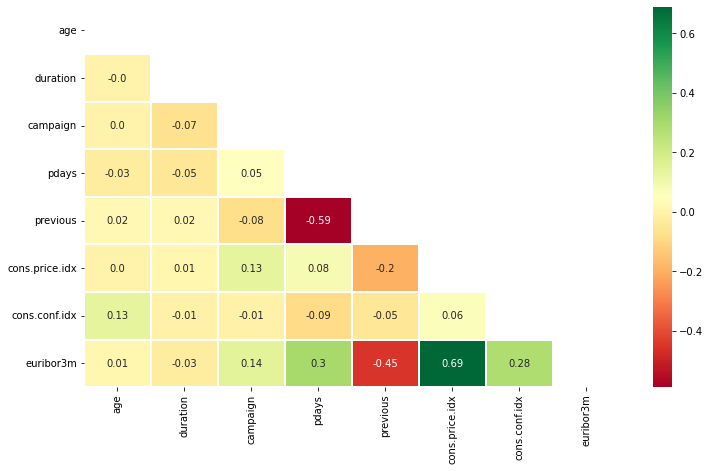

In [203]:
fig, ax = plt.subplots(figsize= (12,7))

corr = df_num.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt="", cmap='RdYlGn', mask=mask, linewidths=0.30, ax=ax)
plt.show()

In [205]:
df_categorical.value_counts()

job        marital   education          default  housing  loan  contact    month  day_of_week  poutcome     y  
admin.     single    university.degree  no       yes      no    cellular   aug    thu          nonexistent  no     60
           married   university.degree  no       yes      no    cellular   aug    wed          nonexistent  no     55
                                                                                  thu          nonexistent  no     51
                                                                                  tue          nonexistent  no     49
           single    university.degree  no       yes      no    cellular   aug    mon          nonexistent  no     45
                                                                                                                   ..
housemaid  divorced  basic.4y           unknown  no       no    cellular   mar    fri          nonexistent  yes     1
                                                              

In [206]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [207]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [208]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [209]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [210]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [211]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [212]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [213]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [214]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [215]:

df_dummy = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)

In [216]:
df_dummy.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0


In [217]:
df_dummy.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.6y                 uint8
education_basic.9y                 uint8
education_high.s

Step 2. List your features

In [218]:
from sklearn.model_selection import train_test_split

# Your code here:

x = df_dummy.drop(['y_yes'], axis=1)
y = df_dummy['y_yes']
# print(x.head())
print(x.shape)
# print(y.head())
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(41188, 51)
(41188,)
(32950, 51)
(32950,)
(8238, 51)
(8238,)


Step 3. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data 
What is the accuracy for your models?

In [220]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto', max_iter=2000)


lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [221]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

The accuracy of the Logistic Regression is: 90.99295945617868 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



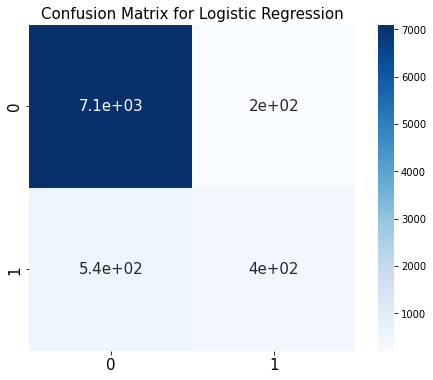

In [222]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

The accuracy of the Random Forest Classifier is: 91.18718135469774 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238



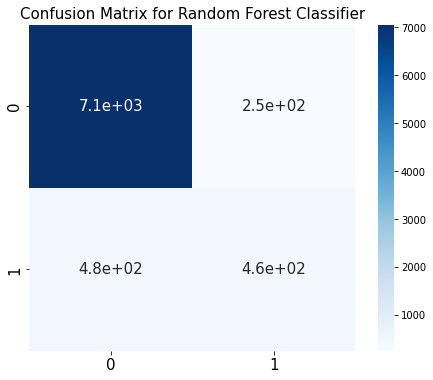

In [224]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')


Step 4. Select features using SelectFromModel method. Explain, how you define the optimal number of features


In [226]:
from sklearn.feature_selection import SelectFromModel

sfm_selector = SelectFromModel(estimator=RandomForestClassifier())
s=sfm_selector.fit(x_train, y_train)

In [227]:
n_features = s.transform(x_train).shape[1]
n_features


8

In [228]:
features_idx = s.get_support()
features_names = x_train.columns[features_idx]
selected_features = features_names.to_list()
selected_features

['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'poutcome_success']


Step 5. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (only selected features). What is the accuracy for your models?

In [233]:
df_clean_dummy = df_dummy[selected_features + ['y_yes']]

x_subset = df_clean_dummy.drop('y_yes', axis = 1)
y_subset = df_clean_dummy['y_yes']
x_subset_train, x_subset_test, y_subset_train, y_subset_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

In [235]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(x_subset_train, y_subset_train)
y_subset_pred = lr.predict(x_subset_test)
print(f'Accuracy score: {accuracy_score(y_subset_test, y_subset_pred):.3f}')
print(confusion_matrix(y_subset_test, y_subset_pred))

Accuracy score: 0.909
[[7117  186]
 [ 567  368]]


The accuracy of the Random Forest Classifier is: 90.81087642631707 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.61      0.53      0.57       935

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



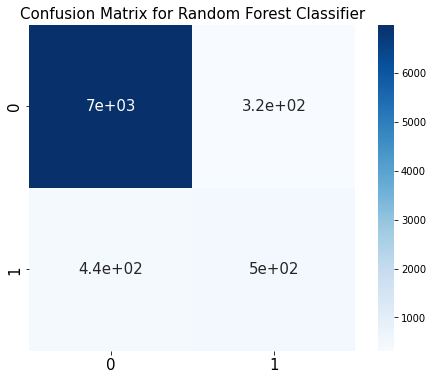

In [237]:
rfc = RandomForestClassifier()
rfc.fit(x_subset_train, y_subset_train)
y_subset_pred = rfc.predict(x_subset_test)
acc_rfc = rfc.score(x_subset_test, y_subset_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_subset_pred, 'Random Forest Classifier')


Step 6. Select features using RFE and RFECV methods. Explain, how you define the optimal number of features for each of the cases.

In [238]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42),n_features_to_select = 7, step = 5, verbose = 1)
m=rfe_selector.fit(x_train, y_train)
rfe_selected_features = x_train.columns[m.get_support()].to_list()
print(rfe_selected_features)
print("Num Features: %s" % (m.n_features_))

Fitting estimator with 51 features.
Fitting estimator with 46 features.
Fitting estimator with 41 features.
Fitting estimator with 36 features.
Fitting estimator with 31 features.
Fitting estimator with 26 features.
Fitting estimator with 21 features.
Fitting estimator with 16 features.
Fitting estimator with 11 features.
['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
Num Features: 7


In [239]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=42),
    step=5,
    n_jobs=-1,
    cv=5,
    verbose = 1
)

In [240]:
m= rfecv.fit(x_train, y_train)
rfecv_selected_features = x_train.columns[m.get_support()].to_list()
print(rfecv_selected_features)
print("Num Features: %s" % (m.n_features_))

Fitting estimator with 51 features.
Fitting estimator with 46 features.
Fitting estimator with 41 features.
Fitting estimator with 36 features.
['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_blue-collar', 'job_management', 'job_services', 'job_technician', 'marital_married', 'marital_single', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'default_unknown', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_mar', 'month_may', 'month_oct', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
Num Features: 31


In [244]:
rfecv_selected_features = dset.iloc[0:7,0].to_list()

Step 7. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (you will have 4 models, taking into account two sets of features that you got). What is the accuracy for your models?


In [245]:
# Logistic regression with selected features from RFE
lr = LogisticRegression(random_state=42)

x_subset_train = x_train[rfe_selected_features]
x_subset_test = x_test[rfe_selected_features]


lr.fit(x_subset_train, y_subset_train)
y_subset_pred = lr.predict(x_subset_test)
print(f'Accuracy score: {accuracy_score(y_subset_test, y_subset_pred):.3f}')
print(confusion_matrix(y_subset_test, y_subset_pred))

Accuracy score: 0.909
[[7117  186]
 [ 567  368]]


In [246]:
rfc = RandomForestClassifier(random_state=42)

x_subset_train = x_train[rfe_selected_features]
x_subset_test = x_test[rfe_selected_features]


rfc.fit(x_subset_train, y_subset_train)
y_subset_pred = rfc.predict(x_subset_test)
print(f'Accuracy score: {accuracy_score(y_subset_test, y_subset_pred):.3f}')
print(confusion_matrix(y_subset_test, y_subset_pred))

Accuracy score: 0.911
[[6994  309]
 [ 428  507]]











Step 8. Please make the conclusion about the utility of the feature selection

In [ ]:
#Much ado about nothing in this example: no significant improvement after feature selection 